## ASSIGNMENT 2

## STUDENT NAME:AYODELE AWOLEYE

## STUDENT ID:8900611

Assignment 2 CSCN8000 Artificial Intelligence Algorithms and Mathematics

1.Consider the heart disease dataset in pandas dataframe 2.Remove outliers using mean,median,Z score. 3.Convert text columns to numbers using label encoding and one hot encoding 4.Apply scaling 5.Build a machine learning classification model using support vector machine. Demonstrate the standalone model as well as Bagging model and include observations about the oerformance 6.Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance 7.Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why.

We'll take the following actions to complete these tasks:

1: Load the heart disease dataset into a pandas DataFrame after importing the required libraries.

2: Use the mean, median, and Z-score techniques to eliminate outliers.

3: Use label encoding and one-hot encoding to convert text columns to numbers.

4: To the numerical columns, apply scaling.

5: Utilise Support Vector Machine (SVM) to create a machine learning classification model.

6: Create a decision tree classification model using machine learning.

7: To determine the situations when using Bagging is most appropriate, compare the performance of SVM and Decision Tree Classifier.

Step 1: Import the necessary libraries and load the dataset.

In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the CSV file

In [33]:

data = pd.read_csv("heart.csv")


In [34]:
# Let's check the first few rows of the data set 
print(data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [35]:
# Check if there are any null values in dataset

In [36]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [37]:
# let get the summary of all the  data
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# let get the outliers and plot them using boxplot

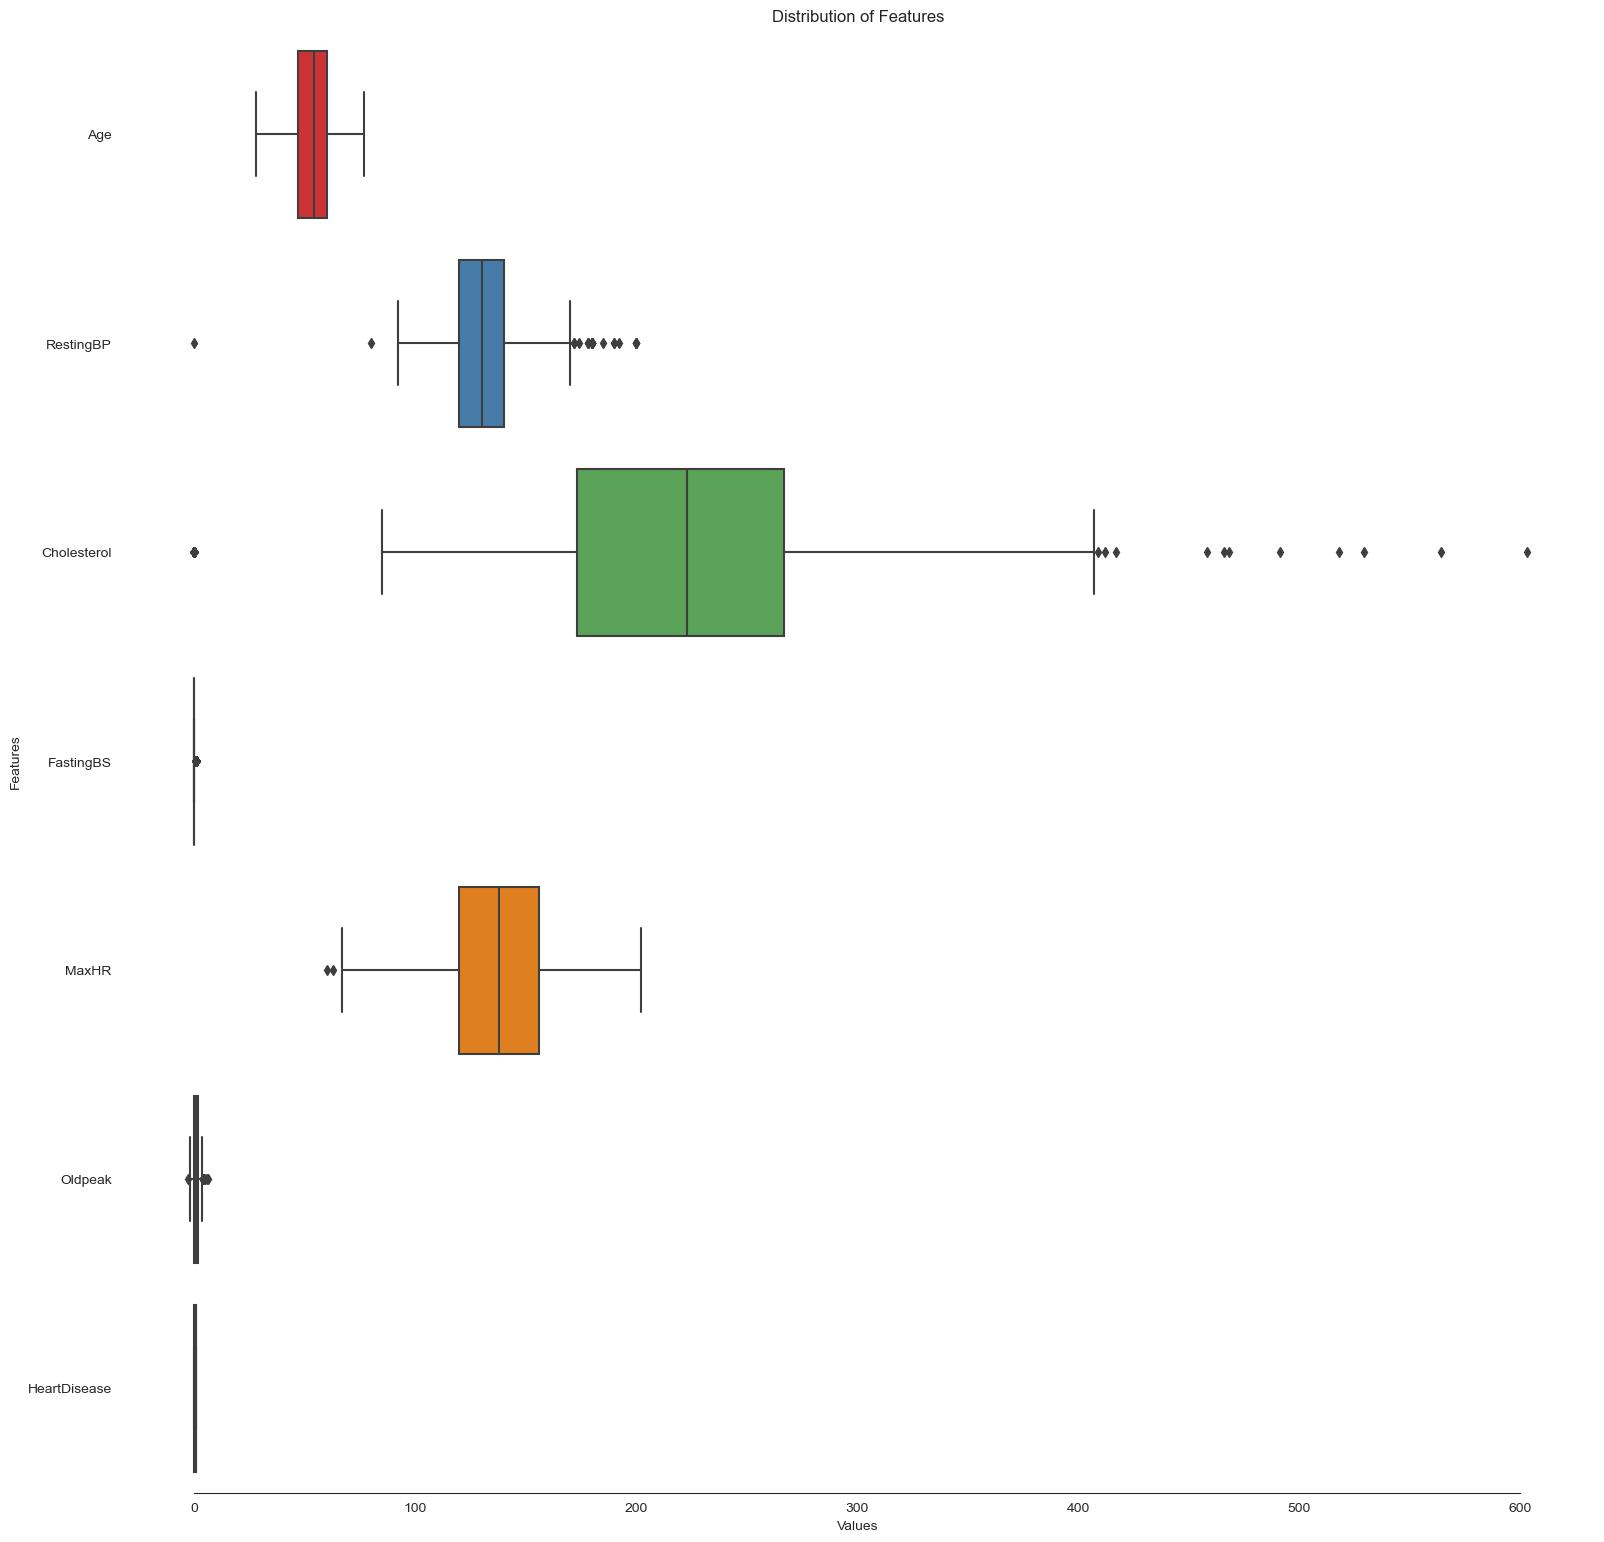

In [39]:
dataOutlier= data.select_dtypes(exclude=['object'])

sns.set_style("white")
f, ax = plt.subplots(figsize=(19, 19))
ax = sns.boxplot(data=dataOutlier, orient="h", palette="Set1")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of Features")
sns.despine(trim=True, left=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


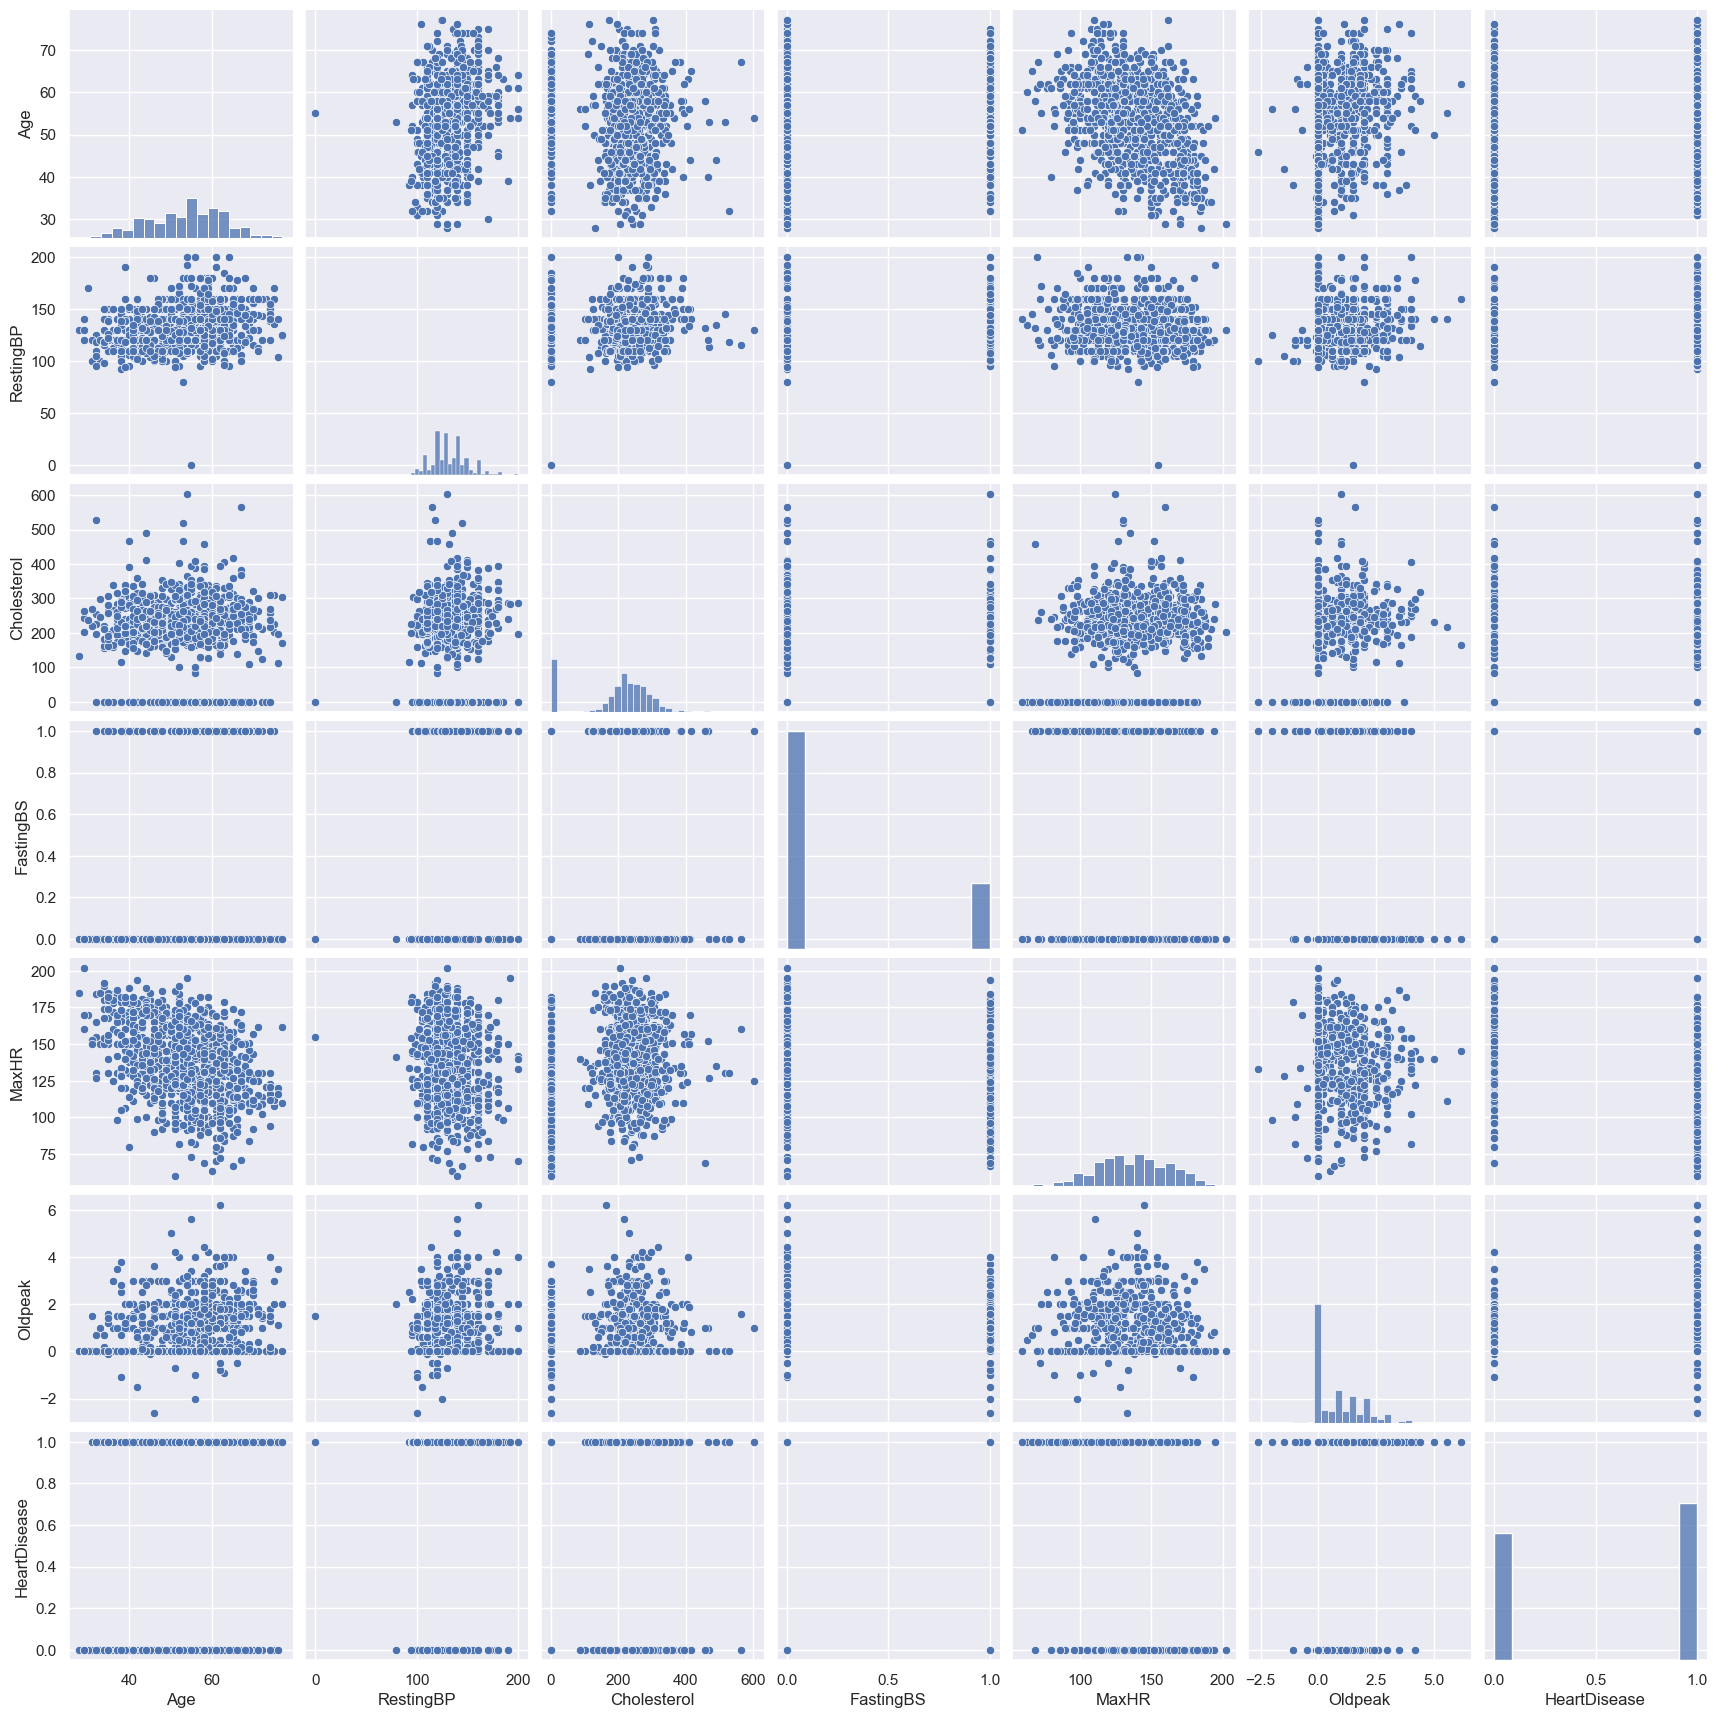

In [40]:
sns.set()
sns.pairplot(dataOutlier, size=2.5)
plt.show()

In [31]:
def remove_outliers_mean(data, columns):
    for column in columns:
        mean = data[column].mean()
        std = data[column].std()
        data = data[(data[column] > mean - 2 * std) & (data[column] < mean + 2 * std)]
    return data

def remove_outliers_median(data, columns):
    for column in columns:
        median = data[column].median()
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]
    return data

def remove_outliers_zscore(data, columns, threshold=3):
    for column in columns:
        z_scores = (data[column] - data[column].mean()) / data[column].std()
        data = data[abs(z_scores) < threshold]
    return data

# Columns for which outliers need to be removed (numerical columns only)
numerical_columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# Remove outliers using mean, median, and Z-score methods
data_mean = remove_outliers_mean(data, numerical_columns)
data_median = remove_outliers_median(data, numerical_columns)
data_zscore = remove_outliers_zscore(data, numerical_columns)

# Let's check the shape of the dataframes after removing outliers using different methods
print("Original Shape:", data.shape)
print("Shape after mean method:", data_mean.shape)
print("Shape after median method:", data_median.shape)
print("Shape after Z-score method:", data_zscore.shape)

Original Shape: (918, 12)
Shape after mean method: (753, 12)
Shape after median method: (690, 12)
Shape after Z-score method: (899, 12)


In [10]:
# Convert categorical columns using label encoding
label_encoder = LabelEncoder()
data["Sex"] = label_encoder.fit_transform(data["Sex"])
data["ChestPainType"] = label_encoder.fit_transform(data["ChestPainType"])
data["FastingBS"] = label_encoder.fit_transform(data["FastingBS"])
data["RestingECG"] = label_encoder.fit_transform(data["RestingECG"])
data["ExerciseAngina"] = label_encoder.fit_transform(data["ExerciseAngina"])
data["ST_Slope"] = label_encoder.fit_transform(data["ST_Slope"])

# Convert categorical columns using one-hot encoding
data_one_hot = pd.get_dummies(data, columns=["ChestPainType", "RestingECG", "ST_Slope"])

# Let's check the modified dataframe with one-hot encoding
print(data_one_hot.head())

   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               0   
1   49    0        160          180          0    156               0   
2   37    1        130          283          0     98               0   
3   48    0        138          214          0    108               1   
4   54    1        150          195          0    122               0   

   Oldpeak  HeartDisease  ChestPainType_0  ChestPainType_1  ChestPainType_2  \
0      0.0             0                0                1                0   
1      1.0             1                0                0                1   
2      0.0             0                0                1                0   
3      1.5             1                1                0                0   
4      0.0             0                0                0                1   

   ChestPainType_3  RestingECG_0  RestingECG_1  RestingECG_2  ST_Slope_0  \
0         

In [11]:
# Separate the features (X) and target (y)
X = data_one_hot.drop("HeartDisease", axis=1)
y = data_one_hot["HeartDisease"]

# Apply scaling to numerical columns using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 5:Build a machine learning classification model using support vector machine. Demonstrate the standalone model as well as Bagging model and include observations about the performance

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build and train the standalone SVM model
svm_model_standalone = SVC(kernel="linear", random_state=42)
svm_model_standalone.fit(X_train, y_train)

# Predict on the test set for the standalone model
y_pred_svm_standalone = svm_model_standalone.predict(X_test)

# Calculate accuracy for the standalone SVM model
accuracy_svm_standalone = accuracy_score(y_test, y_pred_svm_standalone)
print("Accuracy of standalone SVM model:", accuracy_svm_standalone)

# Build and train the Bagging model using SVM as the base estimator
svm_model_bagging = BaggingClassifier(base_estimator=SVC(kernel="linear"), n_estimators=10, random_state=42)
svm_model_bagging.fit(X_train, y_train)

# Predict on the test set for the Bagging model
y_pred_svm_bagging = svm_model_bagging.predict(X_test)

# Calculate accuracy for the Bagging model
accuracy_svm_bagging = accuracy_score(y_test, y_pred_svm_bagging)
print("Accuracy of SVM Bagging model:", accuracy_svm_bagging)

Accuracy of standalone SVM model: 0.8586956521739131


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy of SVM Bagging model: 0.8478260869565217


## OBSERVATION
The accuracy of the standalone SVM model will differ depending on the dataset and problem at hand. SVMs work well for classification jobs in general, especially when the data is well-separated and the classes differ significantly.

Bagging with SVM as the base estimator can improve the model's resilience and generalisation performance when the dataset is noisy or contains outliers. It reduces variance and overfitting by averaging forecasts from various SVM models.
It is possible that the Bagging model outperforms the single SVM model.
The dataset will determine the complexity of the underlying link between the features and the target variable.
Bagging also improves performance when the base estimator is unstable or prone to overfitting. Because SVMs are typically steady, the improvement from Bagging may not be significant in this case.When the performance of the standalone SVM model is poor or the dataset is small and variable, the effectiveness of Bagging may become clearer and visible.

Step 6: Building  the Decision Tree Classification of the  models

In [13]:
# Build and train the standalone Decision Tree Classifier model
data_model_standalone = DecisionTreeClassifier(random_state=42)
data_model_standalone.fit(X_train, y_train)

# Predict on the test set for the standalone Decision Tree model
y_pred_data_standalone = data_model_standalone.predict(X_test)

# Calculate accuracy for the standalone Decision Tree model
accuracy_data_standalone = accuracy_score(y_test, y_pred_data_standalone)
print("Accuracy of standalone Decision Tree model:", accuracy_data_standalone)

# Build and train the Bagging model using Decision Tree Classifier as the base estimator
data_model_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
data_model_bagging.fit(X_train, y_train)

# Predict on the test set for the Bagging model
y_pred_data_bagging = data_model_bagging.predict(X_test)

# Calculate accuracy for the Bagging model
accuracy_data_bagging = accuracy_score(y_test, y_pred_data_bagging)
print("Accuracy of Decision Tree Bagging model:", accuracy_data_bagging)

Accuracy of standalone Decision Tree model: 0.8097826086956522
Accuracy of Decision Tree Bagging model: 0.8641304347826086


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Step 7: Analysing the performance of the Decision Tree Classifier and SVM to determine when and why Bagging is most appropriate:

## let get the accuracy for the model

In [17]:
print("Accuracy for  standalone SVM model is:", accuracy_svm_standalone)
print("Accuracy for SVM Bagging model is:", accuracy_svm_bagging)
print("Accuracy for standalone Decision Tree model is:", accuracy_data_standalone)
print("Accuracy for Decision Tree Bagging model is:", accuracy_data_bagging)

Accuracy for  standalone SVM model is: 0.8586956521739131
Accuracy for SVM Bagging model is: 0.8478260869565217
Accuracy for standalone Decision Tree model is: 0.8097826086956522
Accuracy for Decision Tree Bagging model is: 0.8641304347826086


## MY OBSERVATION WHILE COMPARING THE INDEPENDENT MODEL

Accuracy_svm_standalone: The accuracy of the standalone SVM model is represented by the accuracy_svm_standalone variable. The accuracy of the standalone Decision Tree model is represented by accuracy_dt_standalone. The following bagging models are contrasted:

SVM Bagging: accuracy_svm_bagging represents the accuracy of the Bagging model when SVM is used as the basis estimator. Decision Tree Bagging: accuracy_dt_bagging is a representation of the Bagging model's accuracy when the Decision Tree Classifier is used as the base estimator. How well SVM and Decision Tree Classifier (standalone and Bagging) perform will be determined by the exact dataset and the underlying link between features and the target.
SVM works well with high-dimensional data and nonlinear decision boundaries in general. It can handle complex interactions between features and labels.

The decision tree classifier is a simple and understandable model that can handle both categorical and numerical features. However, it may suffer from overfitting, especially with deep trees.

Bagging reduces overfitting and improves generalisation by combining many instances of the base model. It may be more advantageous when the base model, such as Decision Tree Classifier, is prone to overfitting.When the standalone model's performance is poor or the dataset is limited and highly variable, the benefits of bagging become clear.

When comparing the performance of SVM and Decision Tree Classifier, it may be unnecessary to combine Bagging with SVM if SVM achieves greater accuracy than the Decision Tree model (either alone or with Bagging).

Bagging the Decision Tree, on the other hand, may significantly improve its performance if the standalone Decision Tree Classifier performs less accurately than SVM or exhibits overfitting.